# Averaging using cv.filter2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


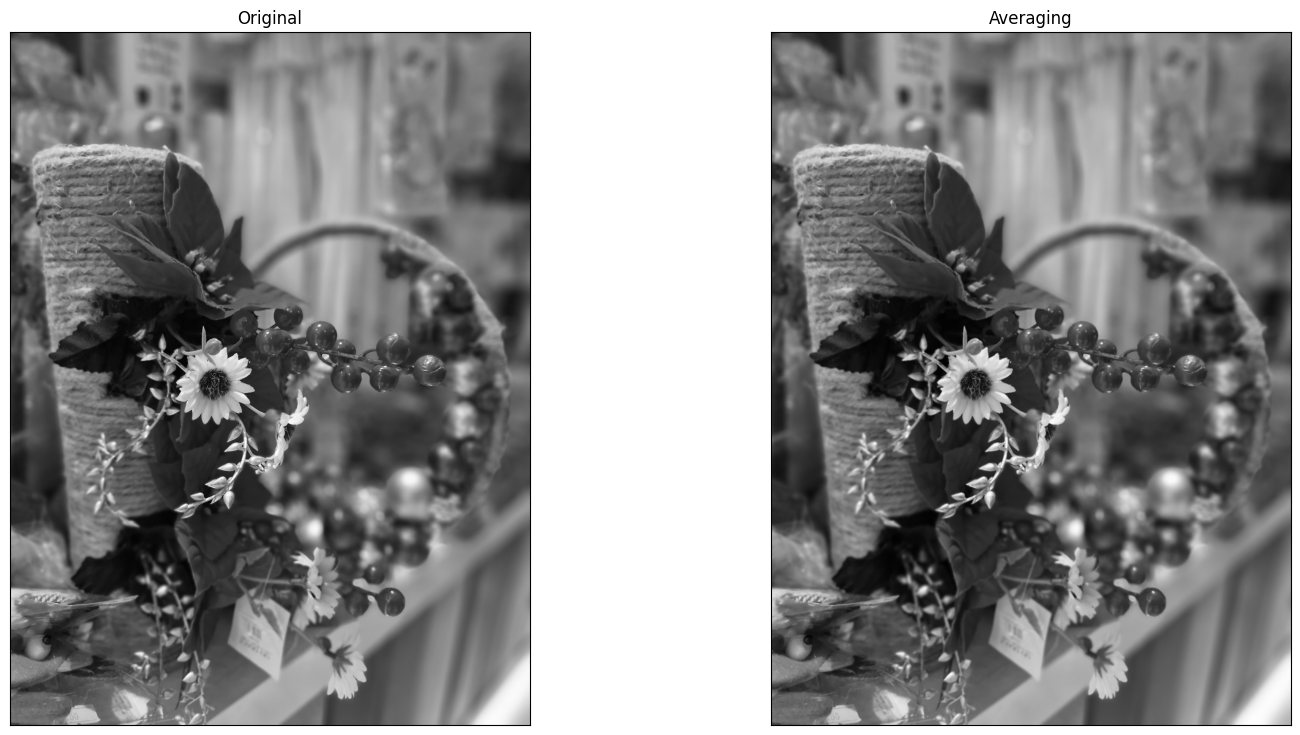

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

kernel=np.ones((3,3),np.float32)/9
imavg=cv.filter2D(im,cv.CV_32F,kernel)

fig,axes=plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,9))
axes[0].imshow(im,cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imavg,cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

# Sobel Filtering Using cv.filter2D

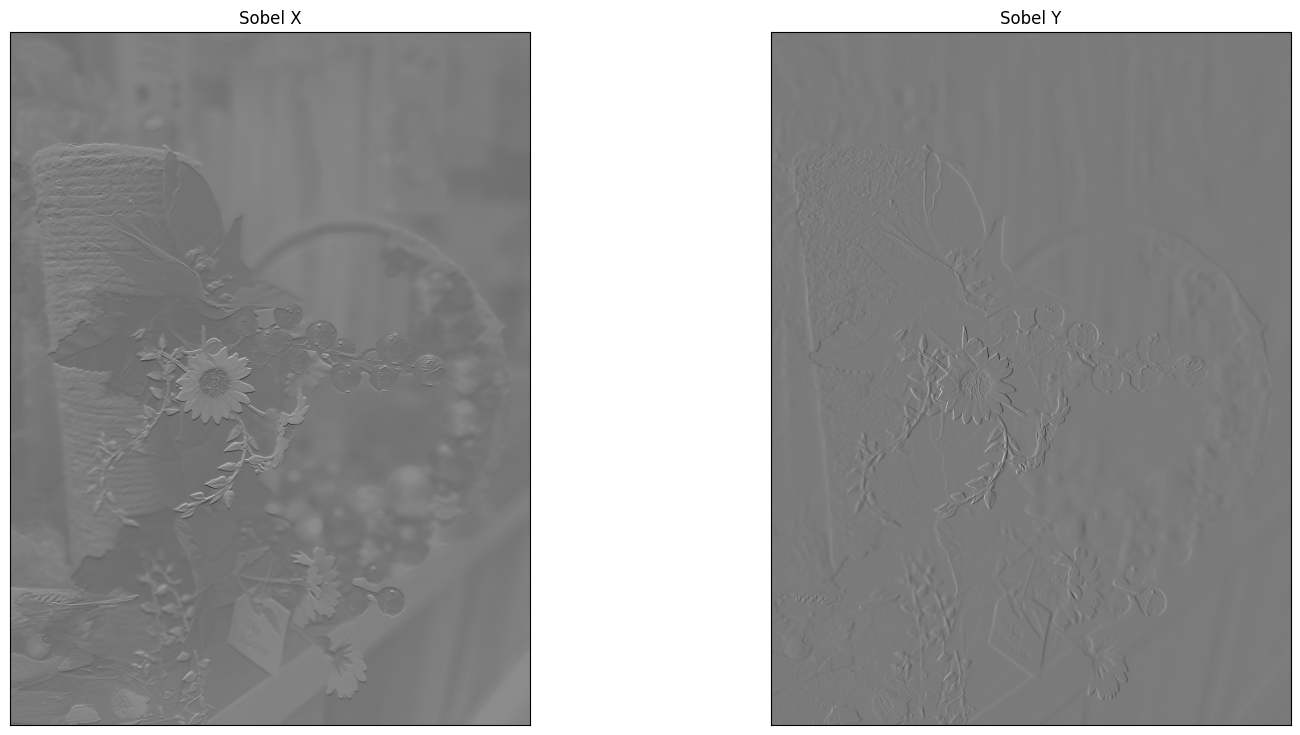

In [6]:
im=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x=np.array([[-1,-2,-1],[0,0,0],[1,2,2]])
sobel_y=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

im_x=cv.filter2D(im,cv.CV_64F,sobel_x)
im_y=cv.filter2D(im,cv.CV_64F,sobel_y)


fig,axes=plt.subplots(1,2,sharex="all",sharey="all",figsize=(18,9))
axes[0].imshow(im_x,cmap='gray')
axes[0].set_title('Sobel X')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(im_y,cmap='gray')
axes[1].set_title('Sobel Y')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

# Sharpening


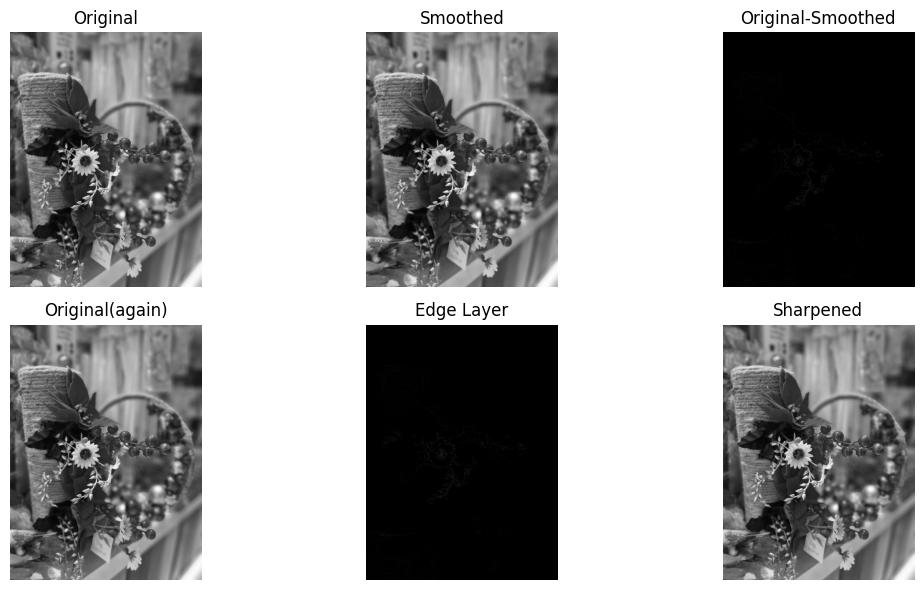

In [13]:
img=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

smoothed=cv.GaussianBlur(img,(5,5),sigmaX=0)
edges=cv.subtract(img,smoothed)
sharpened=cv.add(img,edges)

titles=['Original','Smoothed','Original-Smoothed','Original(again)','Edge Layer','Sharpened']
images=[img,smoothed,edges,img,edges,sharpened]

plt.figure(figsize=(12,6))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.title(titles[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

If the smoothed image has higher pixel values than the original in some areas (which often happens in brighter regions), the result is clamped to 0 — because OpenCV by default works in uint8 (values 0–255).

This leads to a very dark or completely black "edges" image.

**Fixed Code**

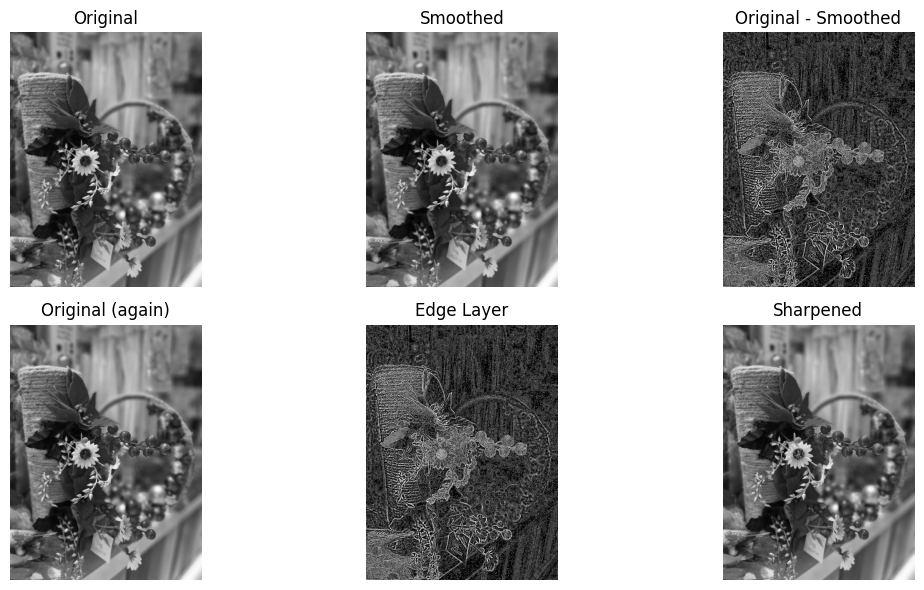

In [14]:
img=cv.imread('/content/drive/MyDrive/IMG-20241130-WA0148.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

smoothed = cv.GaussianBlur(img, (5, 5), sigmaX=0)
edges=img-smoothed
edges_display=cv.normalize(edges,None,0,255,cv.NORM_MINMAX).astype(np.uint8)

sharpened=img+edges
sharpened=np.clip(sharpened,0,255).astype(np.uint8)


titles = ['Original', 'Smoothed', 'Original - Smoothed', 'Original (again)', 'Edge Layer', 'Sharpened']
images = [img.astype(np.uint8), smoothed.astype(np.uint8), edges_display, img.astype(np.uint8), edges_display, sharpened]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

| Line of Code        | Purpose                                                           |
| ------------------- | ----------------------------------------------------------------- |
| `cv.normalize(...)` | Linearly scales edge image for better visualization               |
| `np.clip(...)`      | Ensures pixel values after sharpening stay in valid range (0–255) |
| `.astype(np.uint8)` | Converts image to display-compatible format                       |


# Box Filter vs Gaussian Filter

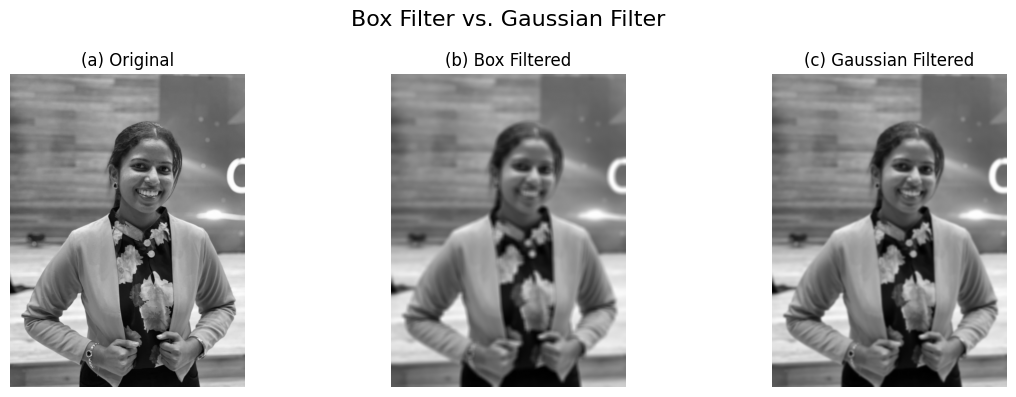

In [16]:
img=cv.imread('/content/drive/MyDrive/Image.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

box_filtered=cv.blur(img,(9,9))
gaussian_filtered=cv.GaussianBlur(img,(9,9),sigmaX=0)

plt.figure(figsize=(12,4))

titles = ['Original', 'Box Filtered', 'Gaussian Filtered']
images = [img, box_filtered, gaussian_filtered]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'({chr(97+i)}) {titles[i]}', fontsize=12)
    plt.axis('off')

plt.suptitle('Box Filter vs. Gaussian Filter', fontsize=16)
plt.tight_layout()
plt.show()


| Feature                 | Box Filter (cv.blur)                           | Gaussian Filter (cv.GaussianBlur)                             |
| ----------------------- | ---------------------------------------------- | ------------------------------------------------------------- |
| **Operation**           | Averages all pixels in the kernel uniformly    | Weights nearby pixels more using a Gaussian (bell-curve) mask |
| **Weight Distribution** | Uniform (equal weight to all pixels in kernel) | Center has higher weight, edges have less                     |
| **Kernel Shape**        | Rectangular/square                             | Gaussian (normal distribution)                                |
| **Edge Preservation**   | Poor – may create artifacts (blurry blocks)    | Better – smooths while preserving structure                   |
| **Noise Handling**      | Average performance                            | Better at removing Gaussian noise                             |
| **Blur Appearance**     | May appear harsh or artificial                 | Natural and smoother blur                                     |
| **Speed**               | Slightly faster                                | Slightly slower (due to weighted kernel math)                 |
| **Use Cases**           | Fast, simple smoothing; pre-processing         | When better quality blur or edge preservation is needed       |


# Gaussian Noise

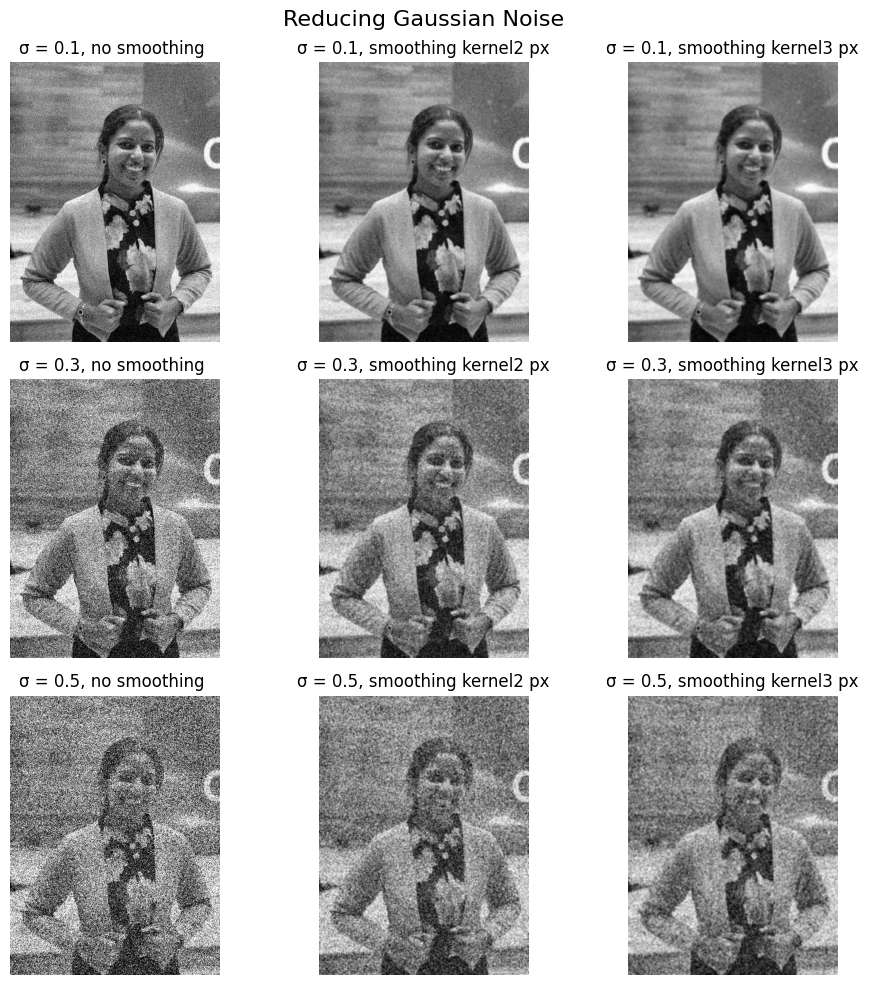

In [22]:
def add_gaussian_noise(img,sigma):

  noise=np.random.normal(0,sigma*255,img.shape).astype(np.float32)
  noisy_img=img.astype(np.float32)+noise
  noisy_img=np.clip(noisy_img,0,255).astype(np.uint8)
  return noisy_img

img=cv.imread('/content/drive/MyDrive/Image.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

sigmas=[0.1,0.3,0.5]
kernel_size=[0,2,3]

fig,axes=plt.subplots(3,3,figsize=(10,10))
fig.suptitle("Reducing Gaussian Noise",fontsize=16)

for i,sigma in enumerate(sigmas):
  for j,ksize in enumerate(kernel_size):
    noisy_img=add_gaussian_noise(img,sigma)
    if ksize>0:
      noisy_img=cv.GaussianBlur(noisy_img,(ksize*2+1,ksize*2+1),0)

    ax=axes[i,j]
    ax.imshow(noisy_img,cmap='gray')
    label=f"σ = {sigma}, "
    label+="no smoothing " if ksize==0 else f"smoothing kernel{ksize} px"
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

| σ (Noise Level) | Kernel Size | Effect on Image                       | Reasoning                                                     |
| --------------- | ----------- | ------------------------------------- | ------------------------------------------------------------- |
| 0.05            | 0           | Slight noise, still clear details     | Low noise without smoothing looks acceptable.                 |
| 0.05            | 1           | Smooth and clean                      | Small kernel suppresses low noise effectively.                |
| 0.05            | 2           | Very clean, slightly softer           | Larger kernel slightly blurs fine textures.                   |
| 0.1             | 0           | Medium noise, noticeable grain        | Moderate noise without smoothing affects visual quality.      |
| 0.1             | 1           | Reduced grain, sharper subject        | Smoothing at kernel 1 balances sharpness and denoising.       |
| 0.1             | 2           | Cleaned well but less sharp           | Larger kernel removes more noise but softens features too.    |
| 0.2             | 0           | Heavily corrupted, hard to recognize  | High noise without smoothing causes significant degradation.  |
| 0.2             | 1           | Visible improvement but noise remains | Small smoothing kernel insufficient for high noise.           |
| 0.2             | 2           | Much clearer, still slightly soft     | Larger kernel smooths well, but loss of sharpness is evident. |


# Median Filtering

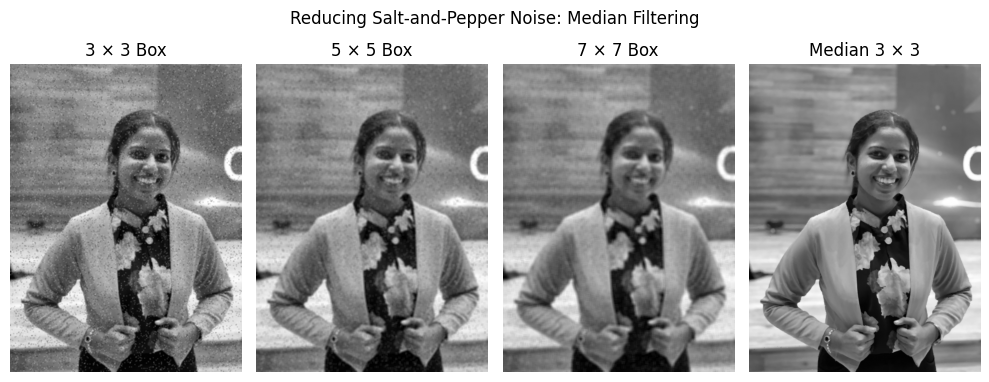

In [23]:
def add_salt_and_pepper_noise(image,amount=0.05):
  noisy=image.copy()
  total_pixels=image.size
  num_salt=int(amount*total_pixels /2)
  num_pepper = int(amount * total_pixels / 2)

  coords=[np.random.randint(0,i-1,num_salt)for i in image.shape]
  noisy[coords[0],coords[1]]=255

  coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
  noisy[coords[0], coords[1]] = 0

  return noisy


img=cv.imread('/content/drive/MyDrive/Image.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

noisy_img = add_salt_and_pepper_noise(img, amount=0.05)

blur_3x3 = cv.blur(noisy_img, (3, 3))
blur_5x5 = cv.blur(noisy_img, (5, 5))
blur_7x7 = cv.blur(noisy_img, (7, 7))
median_3x3 = cv.medianBlur(noisy_img, 3)


titles = ['3 × 3 Box', '5 × 5 Box', '7 × 7 Box', 'Median 3 × 3']
images = [blur_3x3, blur_5x5, blur_7x7, median_3x3]

plt.figure(figsize=(10, 4))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.suptitle("Reducing Salt-and-Pepper Noise: Median Filtering")
plt.tight_layout()
plt.show()

| Aspect                                               | Explanation                                                                                                                                                                                              |
| ---------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 🎯 **Main Goal**                                     | Remove impulse noise (Salt-and-Pepper) while preserving edges and details                                                                                                                                |
| 🧹 **Better than Gaussian Blur for Salt-and-Pepper** | Gaussian blur is a linear filter and **averages all pixels**, so it **spreads the noise** rather than removing it. Median filtering, instead, **replaces outliers** without affecting surrounding pixels |
| 🧠 **How it works**                                  | For each pixel, consider a local neighborhood (e.g., 3×3 window), sort the pixel values, and **replace the center pixel with the median** value of the sorted list                                       |
| 🧱 **Non-linear**                                    | Because the median operation is not a weighted sum like convolution, **median filtering is not a linear filter**                                                                                         |


| Property                         | Median Filter                    | Gaussian Filter     |
| -------------------------------- | -------------------------------- | ------------------- |
| Reduces Salt-and-Pepper Noise    | ✅ Excellent                      | ❌ Poor              |
| Preserves Edges                  | ✅ Yes (does not blur edges much) | ❌ Edges are blurred |
| Type                             | Non-linear                       | Linear              |
| Works on Random Noise (Gaussian) | ❌ Not very effective             | ✅ Very effective    |
| Works on Impulse Noise           | ✅ Highly effective               | ❌ Not effective     |
